In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt, patches
from matplotlib import cm
import lzma, pickle
import scipy

load_dir = '../Data/'
save_dir = "../Plots/"

### Setting: 

- Graph: 3-RRG, $N=10000$
- Model: Step-dSIR model
- Observation type: Snapshot


In [2]:
graph=r"rrg"
d=3
N=10000

g_s = r"graph_type"
d_s = r"$d$"
N_s = r"$N$"
init_s = r"init"
D_s = r"$\Delta$"
st_s = "snap_time"

r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"

mo0t_s = r"$\widetilde{MO}_{t=0}$"
Rmse_s = r"$R_{MSE}$"

o0_s = r"$O_{t=0}$"
o0R_s = r"$O_{t=0,RND}$"

o0t_s = r"$\widetilde{O}_{t=0}$"
Rse_s = r"$R_{SE}$"

Tobs_S = r"$T_{obs}$"

Import data frame

In [3]:
with lzma.open(load_dir + 'Fig5.6.11.xz', "rb") as f:
    data_frame = pickle.load(f)

data_frame = data_frame[(data_frame["o_type"]=="rho") & (data_frame["s_type"]=="delta")]
data_frame[r_s] = data_frame["M"]
data_frame[del_s] = data_frame["S"]
data_frame[Tobs_S] = data_frame[st_s]
data_frame[r"$f_R$" ] = 1 - data_frame[r"$f_S$"] - data_frame[r"$f_I$"]

Choose initialization (random/uniform)

In [4]:
init="rnd"

In [5]:
df = data_frame[((data_frame[init_s]==init) & (data_frame[g_s]==graph) & (data_frame[d_s]==d) & (data_frame[N_s]==N) & (data_frame[st_s]!=0)& (data_frame[st_s]<=12)& (data_frame[del_s]!= 0.005)& (data_frame[del_s]!= 0.01)& (data_frame[del_s]!= 0.015))]
#df[df["iteration"]==2000][o0t_s]=0.5
#df.loc[df[o0t_s]<0,o0t_s]=0.

In [6]:
df.iloc[:,20:35]

,$T$,$f_S$,$f_I$,$T_O$,$T_{BP}$,$infer_up_to$,$\Delta$,damping,error,iteration,it_final,logL,$O_{t=0}$,"$O_{t=0,RND}$",$MO_{t=0}$
0,17,0.6139,0.0087,7,7,7,1,0.2,8.4353366e-07,16,16,-5029.667969,0.9045,0.8969,0.907500
2,12,0.3340,0.0000,12,12,12,1,0.2,5.684245e-07,9,9,-5536.195312,0.7371,0.7237,0.736856
4,12,0.3725,0.0050,6,6,6,1,0.2,4.8075873e-07,12,12,-5726.574219,0.7597,0.7461,0.760865
6,12,0.1084,0.0004,9,9,9,1,0.2,9.856977e-07,10,10,-2911.851562,0.7283,0.7277,0.727159
8,8,0.6888,0.3112,2,2,2,501,0.2,7.5068607e-07,22,22,-3056.242188,0.9900,0.9531,0.988898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57588,14,0.9434,0.0566,4,4,4,501,0.2,3.3760833e-07,13,13,-461.246094,0.9994,0.9980,0.999583
57590,6,0.0081,0.0000,11,11,11,1,0.2,2.2940591e-07,6,6,-407.570312,0.6155,0.6155,0.625332
57592,6,0.0000,1.0000,12,12,12,501,0.2,3.443616e-07,1,1,24.882812,0.8495,0.8495,0.850000
57594,13,0.5219,0.1777,3,3,3,1,0.2,8.762172e-07,39,39,-3835.644531,0.9825,0.9513,0.981887


#### Overlap

In [23]:
y_s=mo0t_s
#y_s=Rmse_s

In [24]:
#DATA MANIPULATION
l_list = np.sort(df[l_s].unique())
D_list = np.sort(df[D_s].unique())
st_list = np.sort(df[st_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_D = len(D_list)
len_st = len(st_list)
len_del = len(del_list)

y_tab = np.zeros((len_D, len_l,len_st,len_del))
D_tab = np.zeros((len_D, len_l,len_st,len_del))
l_tab = np.zeros((len_D, len_l,len_st,len_del))
st_tab = np.zeros((len_D, len_l,len_st,len_del))
d_tab = np.zeros((len_D, len_l,len_st,len_del))

for i_D,Delta in enumerate(D_list):
    for i_l,lam in enumerate(l_list):
        for i_st,st in enumerate(st_list):
            for i_d,delta in enumerate(del_list):
                y_tab[i_D][i_l][i_st][i_d] = df[ (df[D_s]==Delta) & (df[l_s]==lam) & (df[st_s]==st) & (df[del_s]==delta)][y_s].mean()
                D_tab[i_D][i_l][i_st][i_d] = Delta
                l_tab[i_D][i_l][i_st][i_d] = lam
                st_tab[i_D][i_l][i_st][i_d] = st
                d_tab[i_D][i_l][i_st][i_d] = delta
df_flat = pd.DataFrame({st_s:st_tab.flatten(),l_s:l_tab.flatten(),D_s:D_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_D_lam_list = [[],[]]
for i,Delta in enumerate(D_list):
    for lam in l_list:
        df_D_lam_list[i].append( df_flat[ (df_flat[l_s]==lam) & (df_flat[D_s]==Delta)].drop(D_s,axis=1).drop(l_s,axis=1).dropna(axis=0) )

Single heatmap

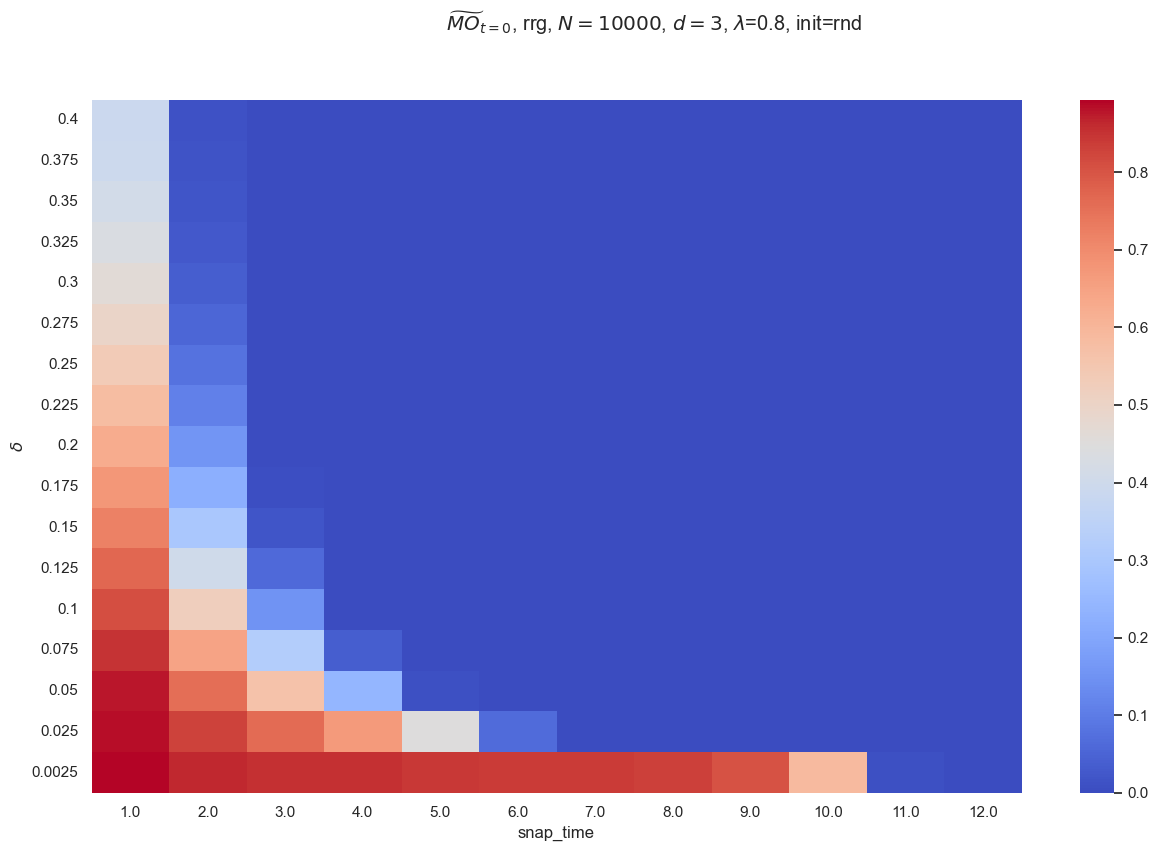

In [25]:
sns.set_theme(font_scale=1)
fig,ax = plt.subplots(figsize=(15,9))
i=1
j=2
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_D_lam_list[i][j].pivot(del_s,st_s,y_s),cmap=cm.coolwarm)
ax.invert_yaxis()

Contour plots

In [26]:
df_lam_cut=[df_D_lam_list[0][0],df_D_lam_list[0][1],df_D_lam_list[0][2],df_D_lam_list[1][0],df_D_lam_list[1][1],df_D_lam_list[1][2]]
l_cut = [l_list[0],l_list[1],l_list[2],l_list[0],l_list[1],l_list[2]]
D_cut = [1,1,1,501,501,501]
D_S = [D_s + " = 1"]*3 + ["SI"]*3

In [27]:
f_list = []
x_un_list = []
y_un_list = []
z_un_list = []
for i, df_lam in enumerate(df_lam_cut):
    x = df_lam[st_s].values
    y = df_lam[del_s].values
    z = df_lam[y_s].values
    x_un_list.append(np.unique(x))
    y_un_list.append(np.unique(y))
    z_un_list.append(df_lam[y_s].values.reshape((len(np.unique(x)),-1)))
    f_list.append(scipy.interpolate.RectBivariateSpline(x_un_list[i], y_un_list[i], z_un_list[i], s=0.005))

In [28]:
minx,maxx,miny,maxy=[1,12,0.0,0.4]
cmmin,cmmax=[0,1]
linev=[0.25,0.5,0.75]

rec_start = [(12.5,0.01), (12.5,0.005), (8.5,0.001),(11.5,0.01), (8.5,0.005), (6.5,0.001)]
rec_height = np.array([0.01,0.025,0.015,0.01,0.025,0.04])
rec_width = np.array([0.5,3.5,3.5,0.5,3.5,5.5 ])-0.001

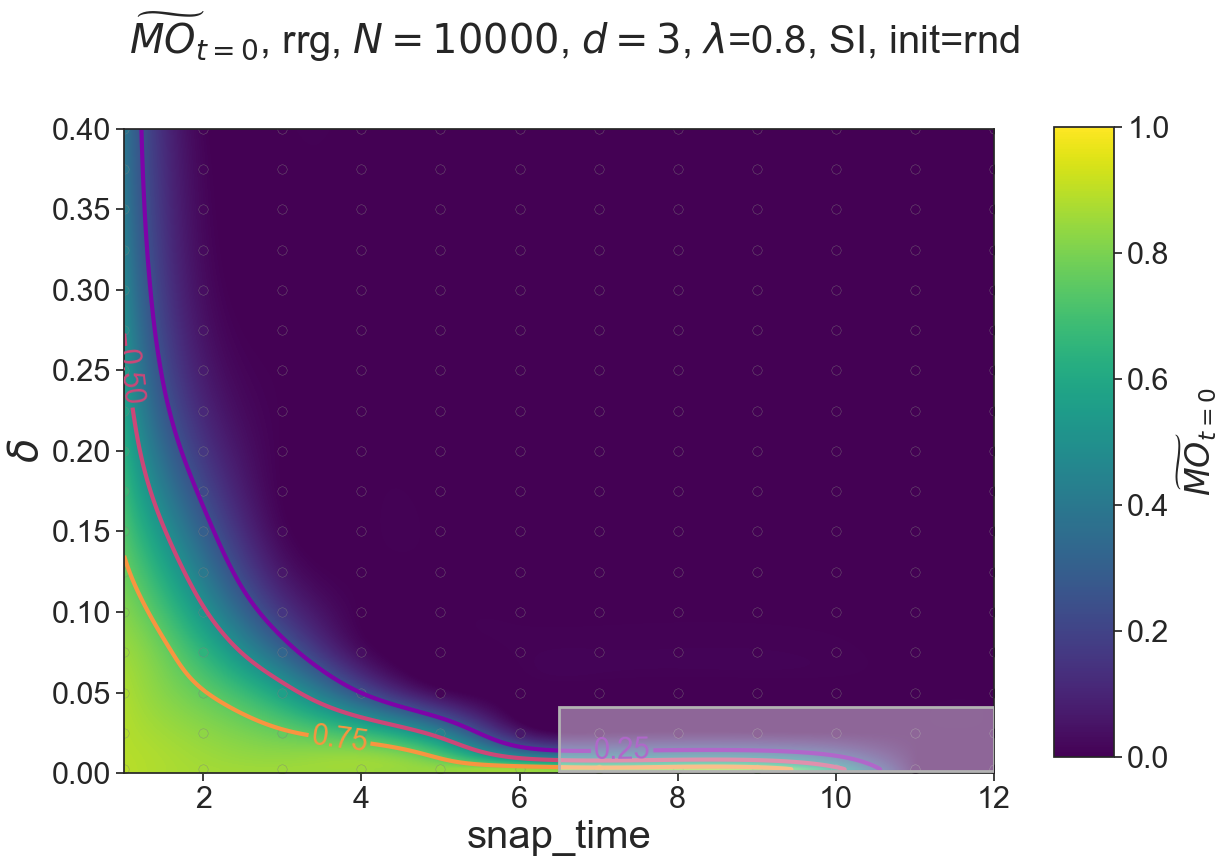

In [29]:
i=5

sns.set_theme(style="ticks", font_scale=2)
fig,ax = plt.subplots(1,1, figsize=(12,9))
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, {l_s}={l_cut[i]}, {D_S[i]}, init={init}")
# Make data
X1 = np.arange(minx, maxx*1.0005, maxx*0.001)
Y1 = np.arange(miny, maxy*1.0005, maxy*0.001)
#X, Y = np.meshgrid(X1, Y1)
Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
# Plot the surface.
surf = ax.imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto')
cset = plt.contour(Z, linev, linewidths=3,
                   cmap=plt.cm.plasma,
                   extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax)
plt.clabel(cset, inline=True, fmt='%1.2f', fontsize=21)
for i_x, x in enumerate(x_un_list[i]):
    for i_y, y in enumerate(y_un_list[i]):
        ax.scatter(x, y, s=45, color=cm.viridis(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.25)
        #pass
ax.set_xlabel(st_s, fontsize='large')
ax.set_ylabel(del_s,  fontsize='large')
ax.set_xlim([minx,maxx])
ax.set_ylim([0,maxy])
rectangle = patches.Rectangle(rec_start[i], rec_width[i], rec_height[i], edgecolor=(0.7,0.7,0.7,1), facecolor=(1,1,1,0.4), linewidth=2,zorder=10)
ax.add_patch(rectangle)
# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(surf, cax=cbar_ax, label=y_s)
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)
#fig.savefig(save_dir + f"ProvaOpaque.pdf")

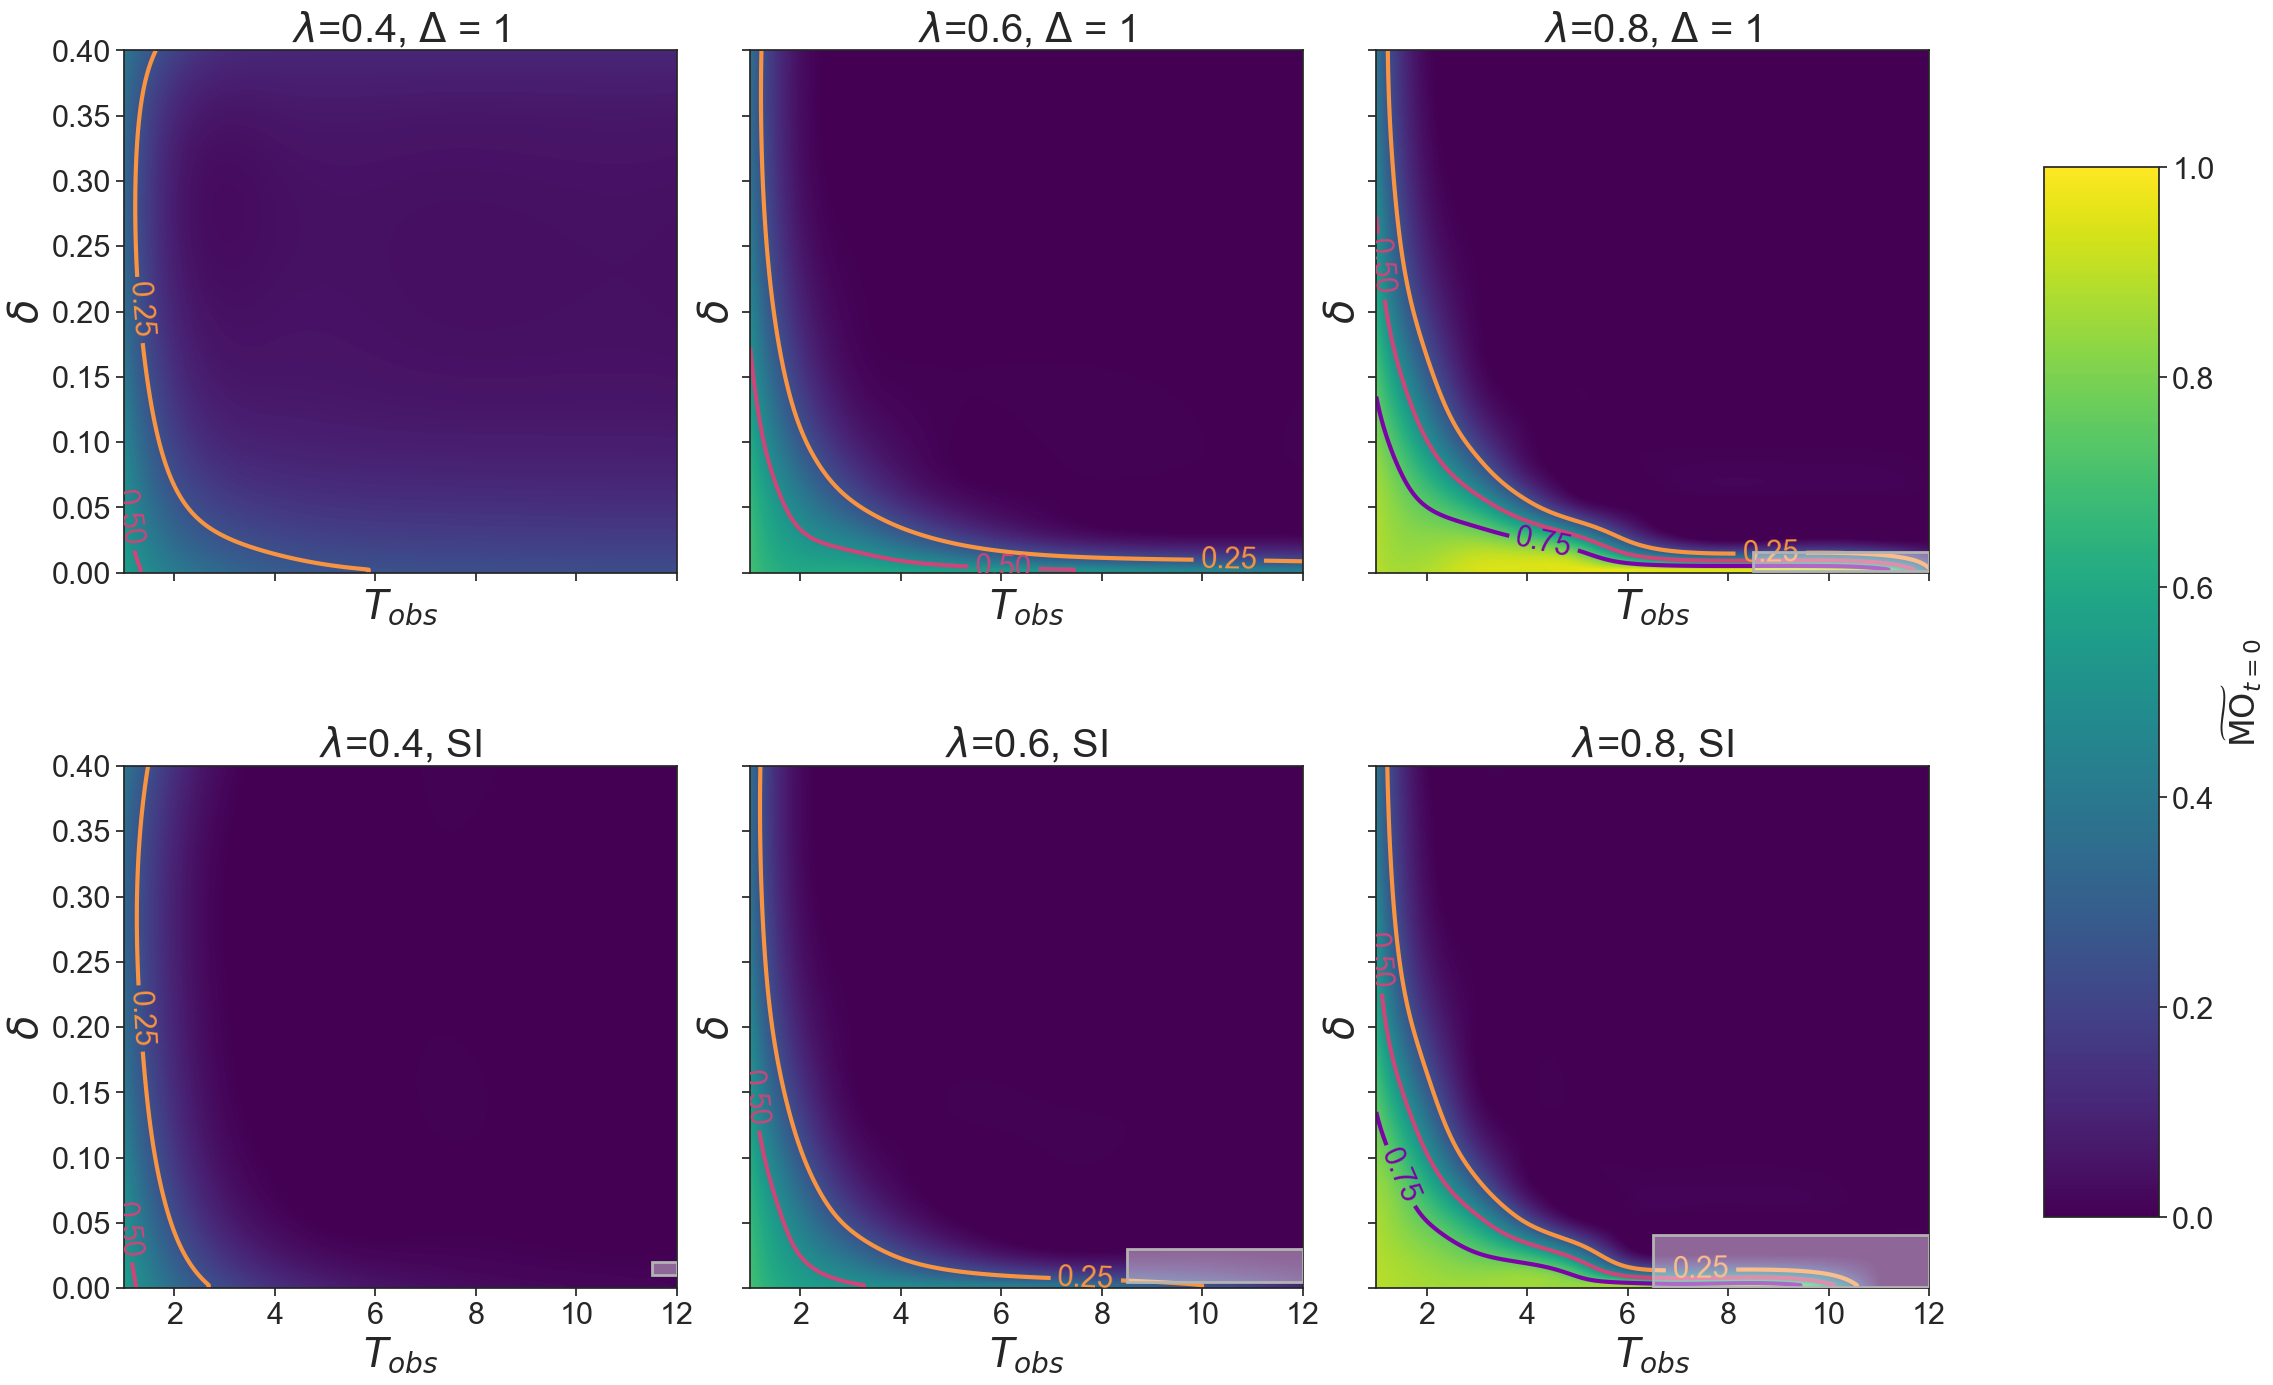

In [30]:
sns.set_theme(style="ticks",font_scale=2)
fig, axs = plt.subplots(2,3, figsize=(23,15), sharex=True, sharey=True)
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + f"init={init}")
for i in range(len(l_cut)):
    # Make data
    X1 = np.arange(minx, maxx*1.0005, maxx*0.0015)
    Y1 = np.arange(miny, maxy*1.0005, maxy*0.0015)
    #X, Y = np.meshgrid(X1, Y1)
    Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
    # Plot the surface.
    surf =  axs[int(i/3)][i%3].imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto',vmin=cmmin,vmax=cmmax)
    cset=(axs[int(i/3)][i%3].contour(Z, linev, linewidths=3,
                    cmap=plt.cm.plasma_r,
                    extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax))
    axs[int(i/3)][i%3].clabel(cset, inline=True, fmt='%1.2f', fontsize=21)
    for i_x, x in enumerate(x_un_list[i]):
        for i_y, y in enumerate(y_un_list[i]):
            #ax.scatter(x, y, s=40, color=cm.coolwarm(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.2)
            pass

    axs[int(i/3)][i%3].set_xlabel(Tobs_S, fontsize='large')
    axs[int(i/3)][i%3].set_ylabel(del_s,  fontsize='large')
    axs[int(i/3)][i%3].set_title(l_s + f"={l_cut[i]}, " + D_S[i],  fontsize='large')
    axs[int(i/3)][i%3].set_xlim([minx,maxx])
    axs[int(i/3)][i%3].set_ylim([miny,maxy])
    rectangle = patches.Rectangle(rec_start[i], rec_width[i], rec_height[i], edgecolor=(0.7,0.7,0.7,1), facecolor=(1,1,1,0.4), linewidth=2,zorder=10)
    axs[int(i/3)][i%3].add_patch(rectangle)
    axs[int(i/3)][i%3].set_box_aspect(0.945)

# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(surf, cax=cbar_ax,label=r"$\widetilde{\rm MO}_{t=0}$")
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

fig.savefig(save_dir + f"Figure5.pdf")

#### MSE

In [31]:
#y_s=mo0t_s
y_s=Rmse_s

In [32]:
#DATA MANIPULATION
l_list = np.sort(df[l_s].unique())
D_list = np.sort(df[D_s].unique())
st_list = np.sort(df[st_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_D = len(D_list)
len_st = len(st_list)
len_del = len(del_list)

y_tab = np.zeros((len_D, len_l,len_st,len_del))
D_tab = np.zeros((len_D, len_l,len_st,len_del))
l_tab = np.zeros((len_D, len_l,len_st,len_del))
st_tab = np.zeros((len_D, len_l,len_st,len_del))
d_tab = np.zeros((len_D, len_l,len_st,len_del))

for i_D,Delta in enumerate(D_list):
    for i_l,lam in enumerate(l_list):
        for i_st,st in enumerate(st_list):
            for i_d,delta in enumerate(del_list):
                y_tab[i_D][i_l][i_st][i_d] = df[ (df[D_s]==Delta) & (df[l_s]==lam) & (df[st_s]==st) & (df[del_s]==delta)][y_s].mean()
                D_tab[i_D][i_l][i_st][i_d] = Delta
                l_tab[i_D][i_l][i_st][i_d] = lam
                st_tab[i_D][i_l][i_st][i_d] = st
                d_tab[i_D][i_l][i_st][i_d] = delta
df_flat = pd.DataFrame({st_s:st_tab.flatten(),l_s:l_tab.flatten(),D_s:D_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_D_lam_list = [[],[]]
for i,Delta in enumerate(D_list):
    for lam in l_list:
        df_D_lam_list[i].append( df_flat[ (df_flat[l_s]==lam) & (df_flat[D_s]==Delta)].drop(D_s,axis=1).drop(l_s,axis=1).dropna(axis=0) )

Single heatmap

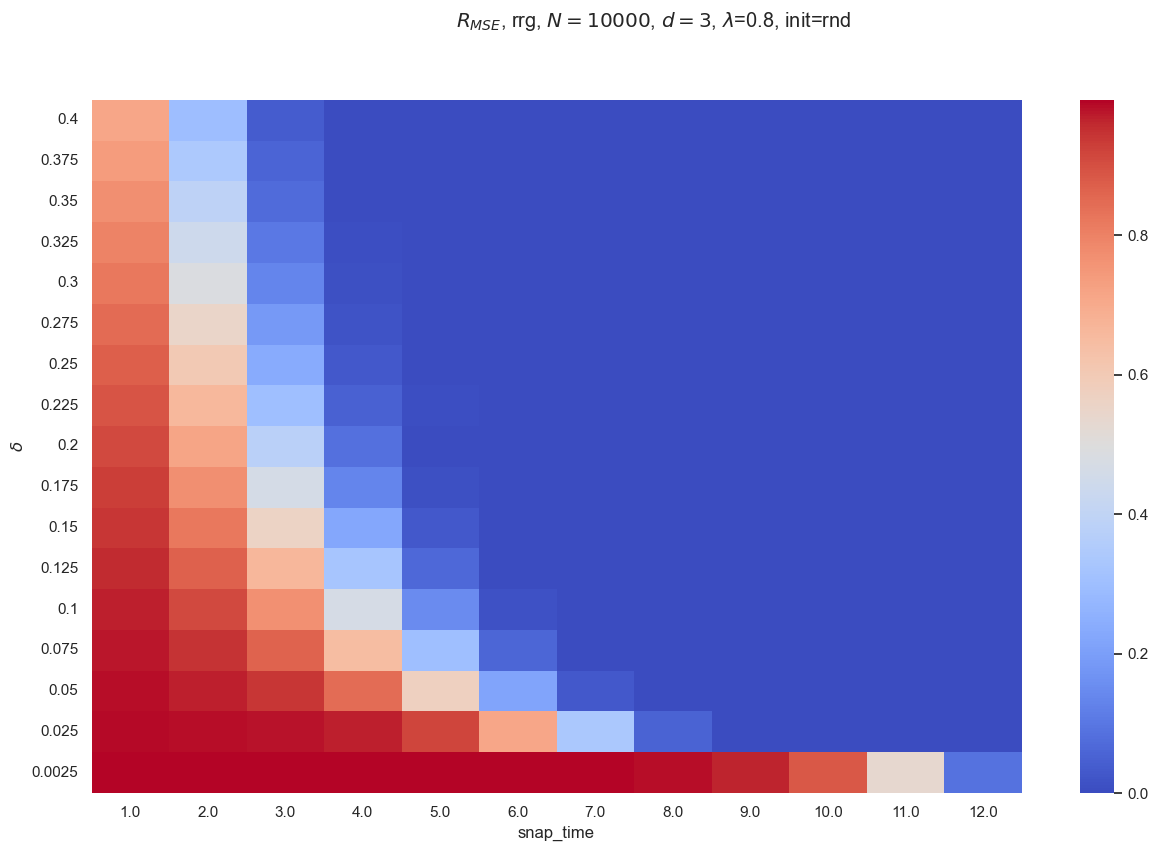

In [33]:
sns.set_theme(font_scale=1)
fig,ax = plt.subplots(figsize=(15,9))
i=1
j=2
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_D_lam_list[i][j].pivot(del_s,st_s,y_s),cmap=cm.coolwarm)
ax.invert_yaxis()

Contour plots

In [34]:
df_lam_cut=[df_D_lam_list[0][0],df_D_lam_list[0][1],df_D_lam_list[0][2],df_D_lam_list[1][0],df_D_lam_list[1][1],df_D_lam_list[1][2]]
l_cut = [l_list[0],l_list[1],l_list[2],l_list[0],l_list[1],l_list[2]]
D_cut = [1,1,1,501,501,501]
D_S = [D_s + " = 1"]*3 + ["SI"]*3

In [35]:
f_list = []
x_un_list = []
y_un_list = []
z_un_list = []
for i, df_lam in enumerate(df_lam_cut):
    x = df_lam[st_s].values
    y = df_lam[del_s].values
    z = df_lam[y_s].values
    x_un_list.append(np.unique(x))
    y_un_list.append(np.unique(y))
    z_un_list.append(df_lam[y_s].values.reshape((len(np.unique(x)),-1)))
    f_list.append(scipy.interpolate.RectBivariateSpline(x_un_list[i], y_un_list[i], z_un_list[i],s=0.002))

In [36]:
minx,maxx,miny,maxy=[1,12,0.0,0.4]
cmmin,cmmax=[0,1]
linev=[0.25, 0.5,0.75,0.9]

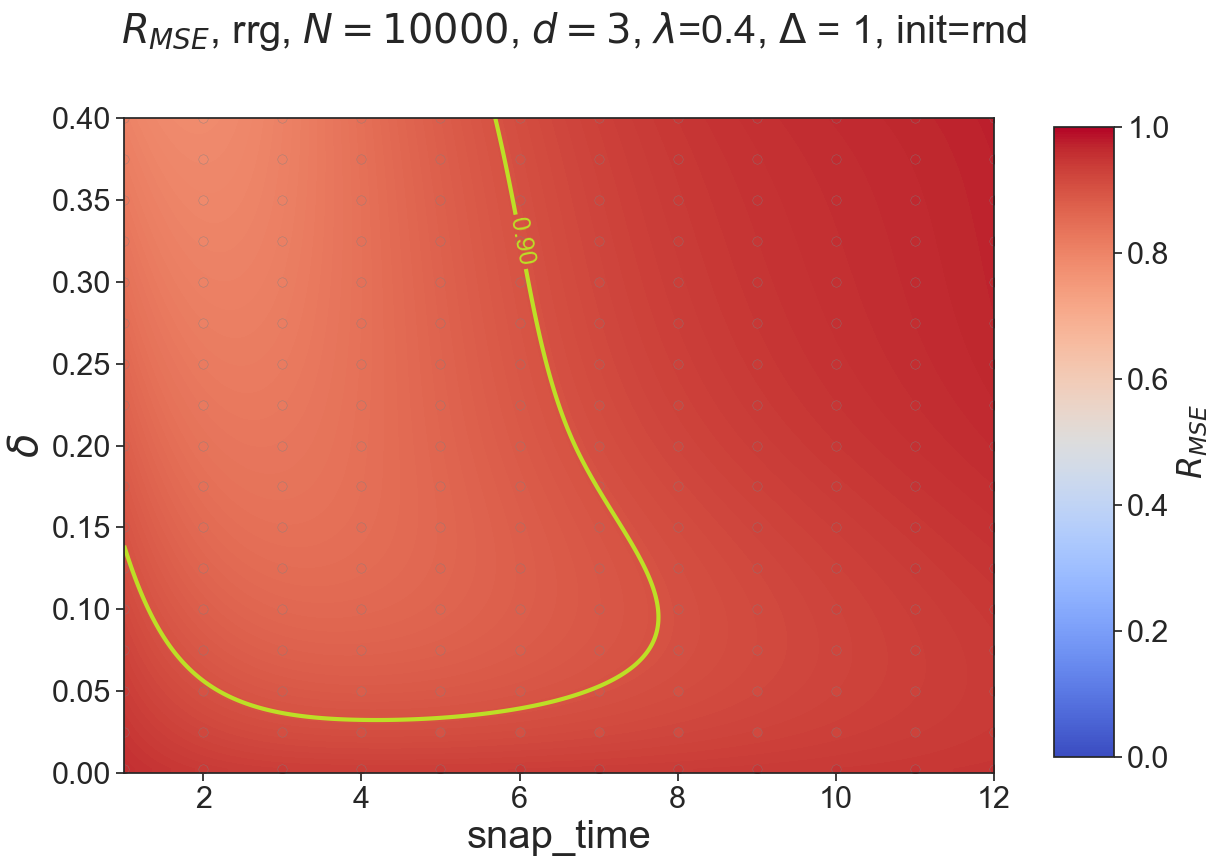

In [37]:
i=0

sns.set_theme(style="ticks", font_scale=2)
fig,ax = plt.subplots(1,1, figsize=(12,9))
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, {l_s}={l_cut[i]}, {D_S[i]}, init={init}")
# Make data
X1 = np.arange(minx, maxx*1.0005, maxx*0.001)
Y1 = np.arange(miny, maxy*1.0005, maxy*0.001)
#X, Y = np.meshgrid(X1, Y1)
Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
# Plot the surface.
surf = ax.imshow(Z, cmap=cm.coolwarm, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto')
cset = plt.contour(Z, linev, linewidths=3,
                   cmap=plt.cm.viridis,
                   extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax)
plt.clabel(cset, inline=True, fmt='%1.2f', fontsize=18)
for i_x, x in enumerate(x_un_list[i]):
    for i_y, y in enumerate(y_un_list[i]):
        ax.scatter(x, y, s=45, color=cm.coolwarm(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.25)
        #pass
ax.set_xlabel(st_s, fontsize='large')
ax.set_ylabel(del_s,  fontsize='large')
ax.set_xlim([minx,maxx])
ax.set_ylim([miny,maxy])
#rectangle = patches.Rectangle((0, 0.0025), 12, 0.0225, edgecolor="grey", facecolor="grey", linewidth=0.1)
#ax.add_patch(rectangle)
# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(surf, cax=cbar_ax, label=y_s)
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

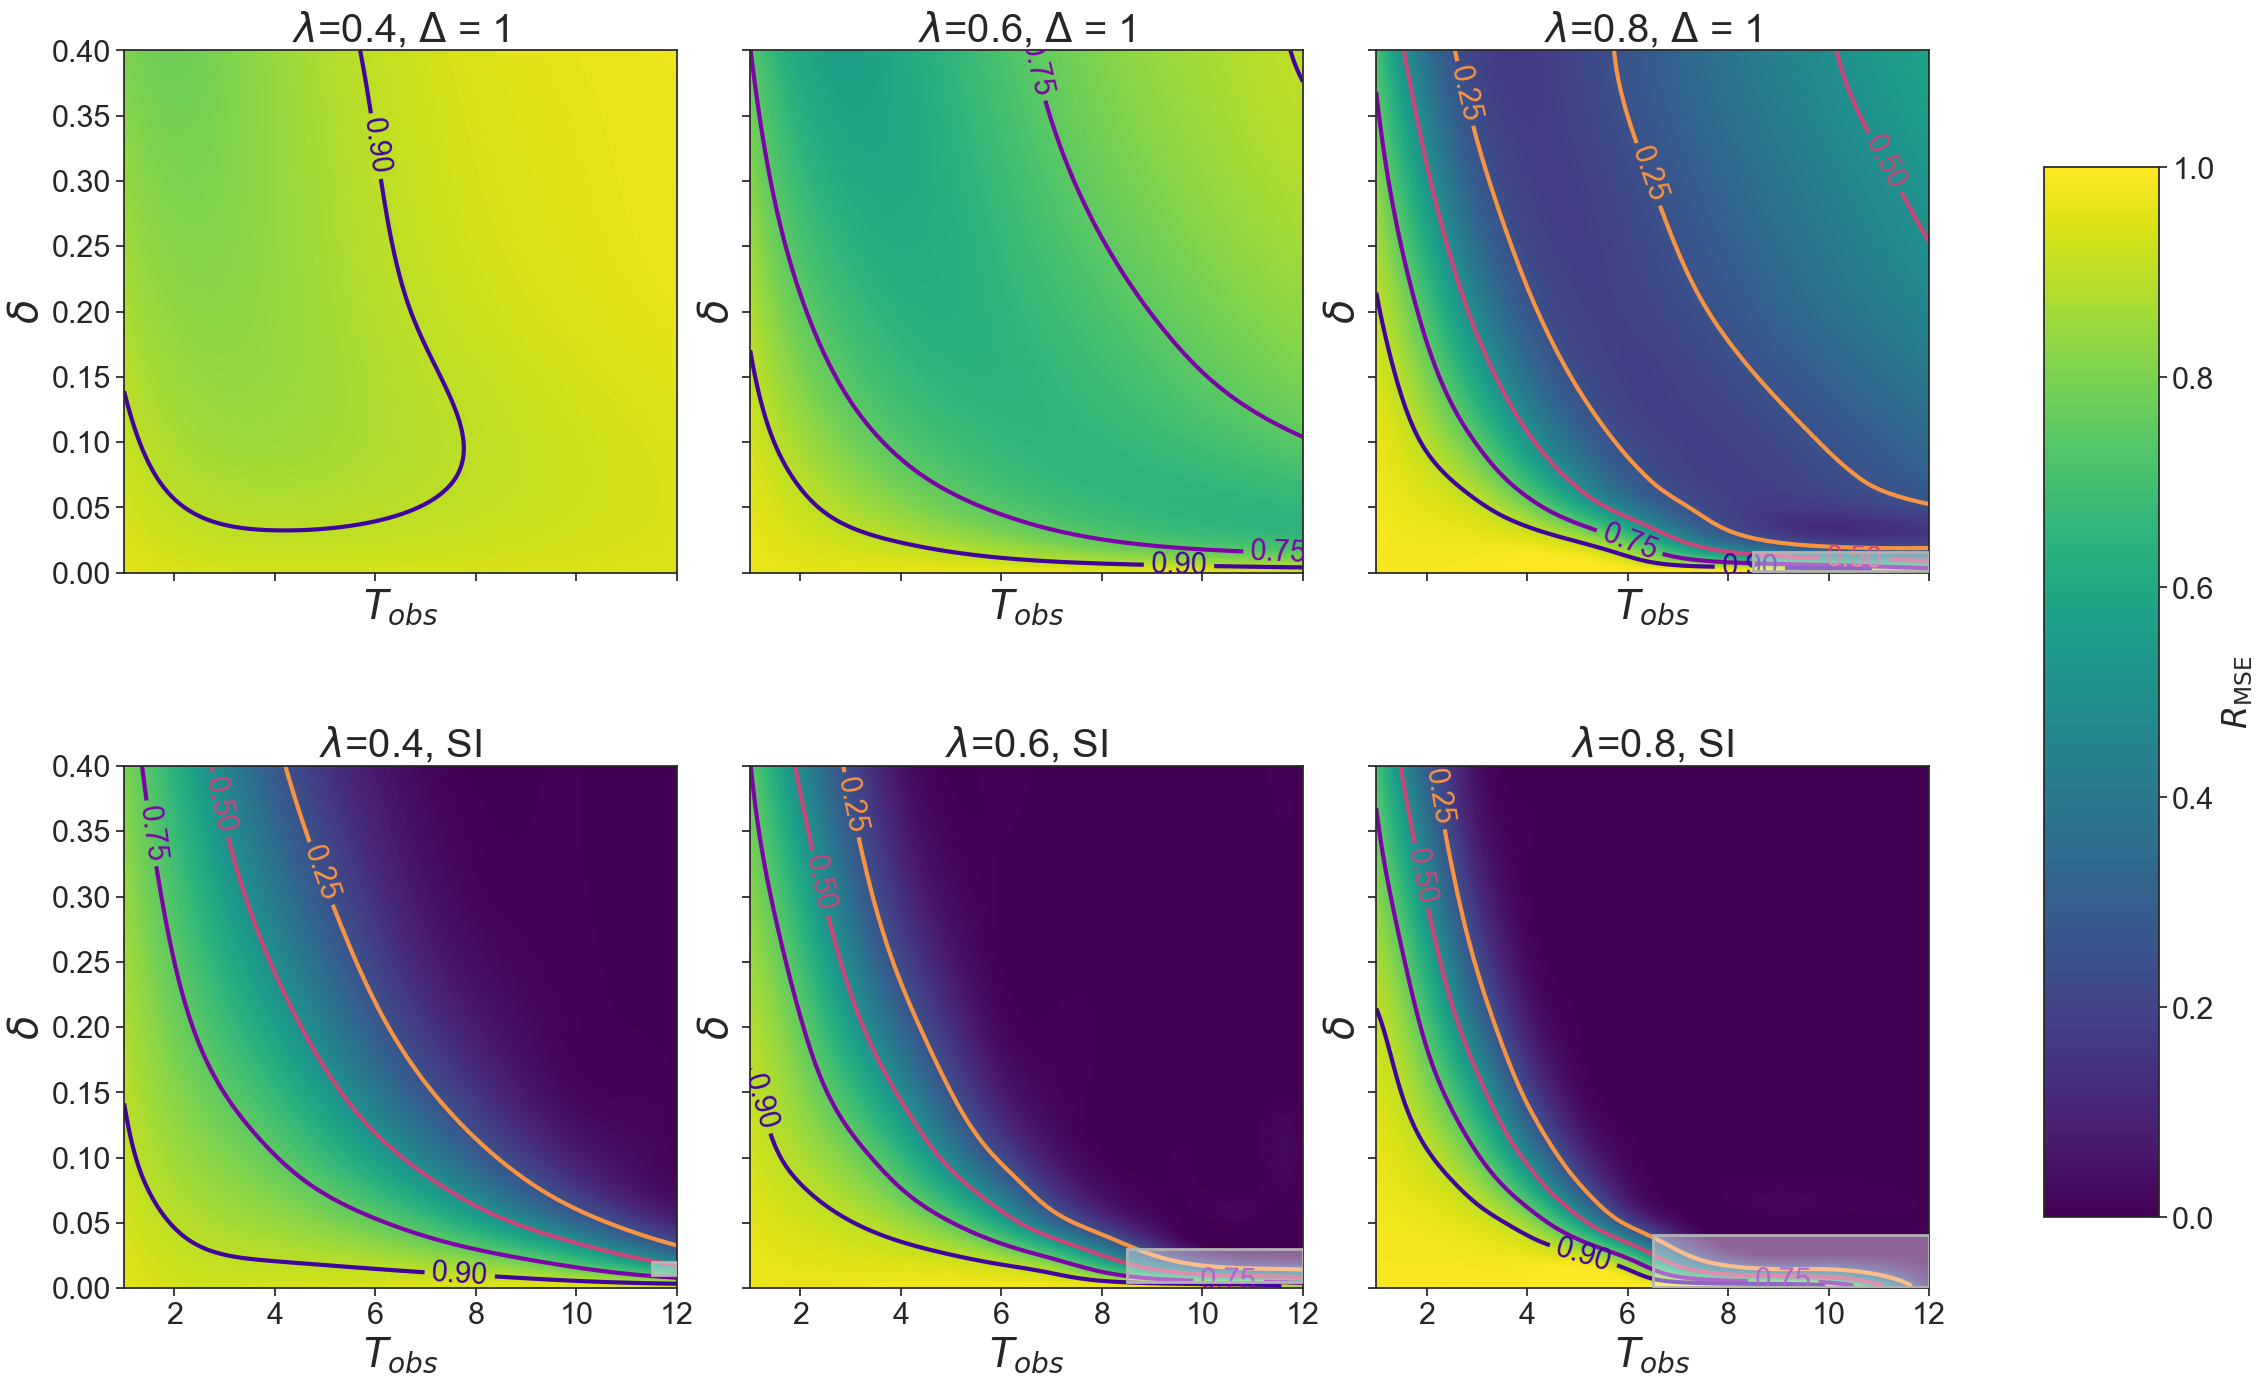

In [38]:
sns.set_theme(style="ticks",font_scale=2)
fig, axs = plt.subplots(2,3, figsize=(23,15), sharex=True, sharey=True)
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + f"init={init}")
for i in range(len(l_cut)):
    # Make data
    X1 = np.arange(minx, maxx*1.0005, maxx*0.0015)
    Y1 = np.arange(miny, maxy*1.0005, maxy*0.0015)
    #X, Y = np.meshgrid(X1, Y1)
    Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
    # Plot the surface.
    surf =  axs[int(i/3)][i%3].imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto',vmin=cmmin,vmax=cmmax)
    cset=(axs[int(i/3)][i%3].contour(Z, linev, linewidths=3,
                    cmap=plt.cm.plasma_r,
                    extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax))
    axs[int(i/3)][i%3].clabel(cset, inline=True, fmt='%1.2f', fontsize=21)
    for i_x, x in enumerate(x_un_list[i]):
        for i_y, y in enumerate(y_un_list[i]):
            #ax.scatter(x, y, s=40, color=cm.coolwarm(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.2)
            pass

    axs[int(i/3)][i%3].set_xlabel(Tobs_S, fontsize='large')
    axs[int(i/3)][i%3].set_ylabel(del_s,  fontsize='large')
    axs[int(i/3)][i%3].set_title(l_s + f"={l_cut[i]}, " + D_S[i],  fontsize='large')
    axs[int(i/3)][i%3].set_xlim([minx,maxx])
    axs[int(i/3)][i%3].set_ylim([miny,maxy])
    rectangle = patches.Rectangle(rec_start[i], rec_width[i], rec_height[i], edgecolor=(0.7,0.7,0.7,1), facecolor=(1,1,1,0.4), linewidth=2,zorder=10)
    axs[int(i/3)][i%3].add_patch(rectangle)
    axs[int(i/3)][i%3].set_box_aspect(0.945)

# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(surf, cax=cbar_ax,label=r"$R_{\rm MSE}$")
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

fig.savefig(save_dir + f"Figure6.pdf")

### Nishimori Check

In [39]:
df = data_frame[((data_frame[init_s]==init) & (data_frame[g_s]==graph) & (data_frame[d_s]==d) & (data_frame[N_s]==N) & (data_frame[st_s]!=0)& (data_frame[st_s]<=12) )]

In [40]:
o0t_s = r"$\widetilde{O}_{t=0}$"
mo0t_s = r"$\widetilde{MO}_{t=0}$"
do0t_s = r"$\widetilde{\delta O}_{t=0}$"

Rse_s = r"$R_{SE}$"
Rmse_s = r"$R_{MSE}$"
dRse_s = r"$\delta R_{SE}$"

dse_s = r"$\delta SE$"
do0_s = r"$\delta O_{t=0}$"

In [41]:
print("l_s: ", np.sort(df[l_s].unique()))
print("del_s: ", np.sort(df["S"].unique()))
print("r_s: ", np.sort(df["M"].unique()))

l_s:  [0.4 0.6 0.8]
del_s:  [0.0025 0.005  0.01   0.015  0.025  0.05   0.075  0.1    0.125  0.15
 0.175  0.2    0.225  0.25   0.275  0.3    0.325  0.35   0.375  0.4   ]
r_s:  [1.]


In [42]:
df_2 = df[ ((df[l_s]==0.6) & ((df[del_s]==0.05) |(df[del_s]==0.1) | (df[del_s]==0.2) | (df[del_s]==0.3) | (df[del_s]==0.4)))]

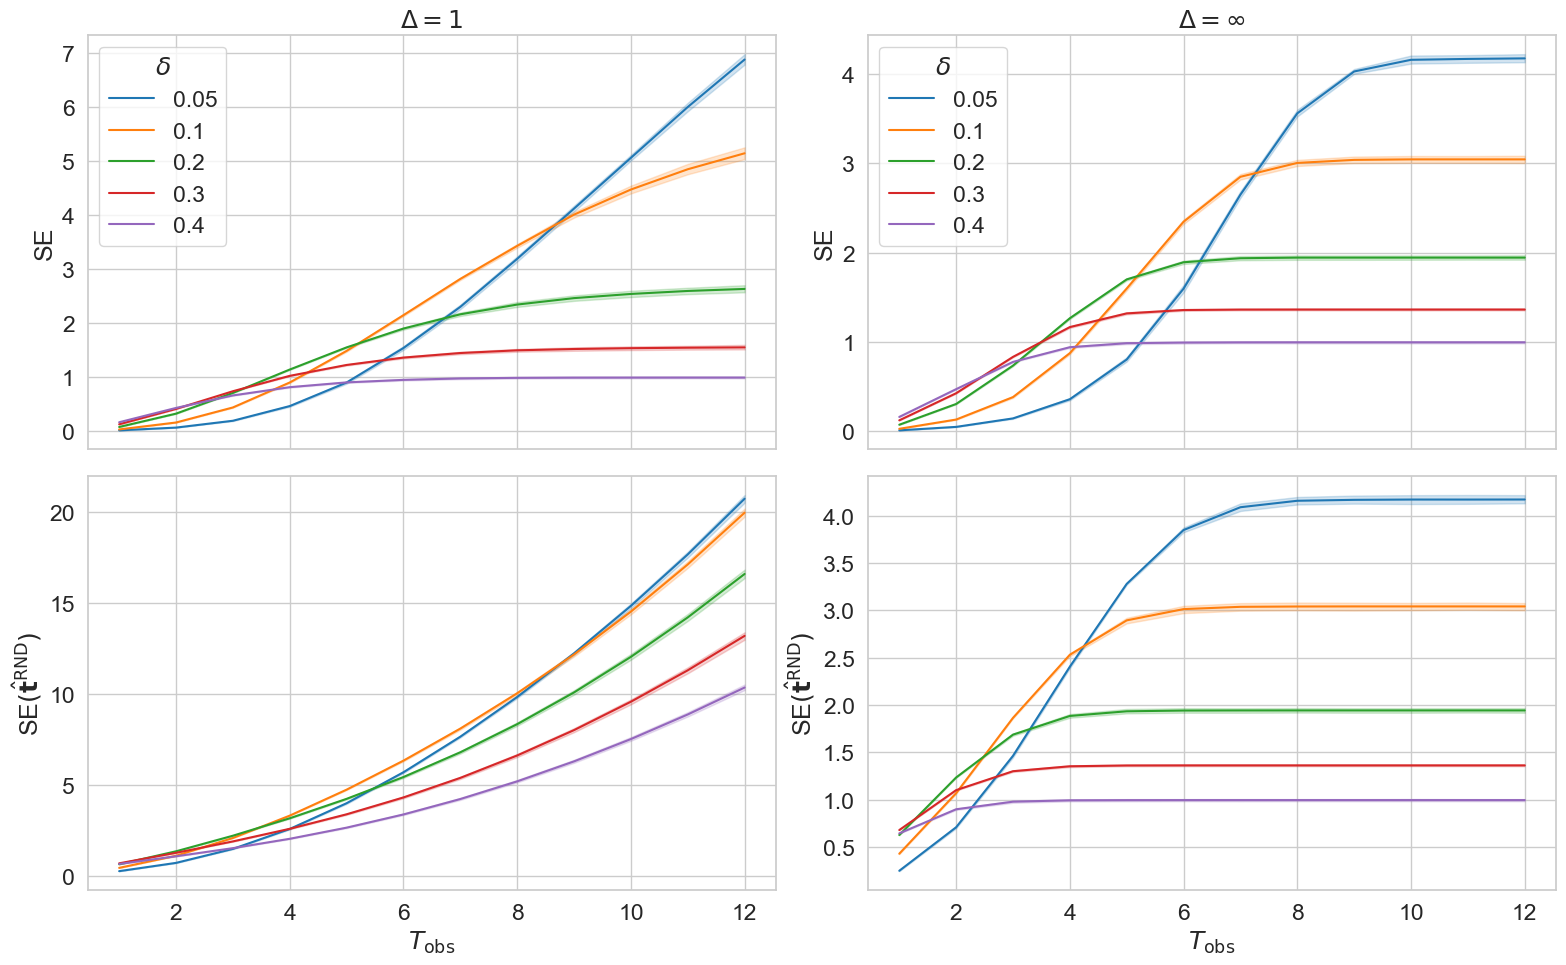

In [43]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(2,2, figsize=(16,10), sharex=True)
#plt.suptitle(f"{graph}, $N=10000$, $d={d}$, init=rnd, $f_I(T)=1$")
sns.lineplot(data = df_2[df_2[D_s]==1], x = st_s, y= "SE", legend=True, ax=ax[0][0], hue=del_s, palette="tab10")
sns.lineplot(data = df_2[df_2[D_s]==1], x = st_s, y= r"$SE_{RND}$", legend=False, ax=ax[1][0], hue=del_s, palette="tab10")
sns.lineplot(data = df_2[df_2[D_s]!=1], x = st_s, y= "SE", legend=True, ax=ax[0][1], hue=del_s, palette="tab10")
sns.lineplot(data = df_2[df_2[D_s]!=1], x = st_s, y= r"$SE_{RND}$", legend=False, ax=ax[1][1], hue=del_s, palette="tab10")
ax[0][0].set_title(r"$\Delta=1$")
ax[0][1].set_title(r"$\Delta=\infty$")
ax[1][0].set_xlabel(r"$T_{\rm obs}$")
ax[1][1].set_xlabel(r"$T_{\rm obs}$")
ax[1][0].set_ylabel(r"SE$(\hat{\mathbf{t}}^{\rm RND})$")
ax[1][1].set_ylabel(r"SE$(\hat{\mathbf{t}}^{\rm RND})$")
plt.tight_layout()
fig.savefig(save_dir + f"Figure11.pdf")